<a href="https://colab.research.google.com/github/eriksali/DNN_2023_NLP/blob/main/reviews_lda_doc_topic_contrib_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# for text preprocessing
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import numpy for matrix operation
import numpy as np

# Importing Gensim
import gensim
from gensim import corpora
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')



In [ ]:
#from google.colab import files
#src = list(files.upload().values())[0]
#open('utils.py','wb').write(src)

In [ ]:


#from utils import load_data
#from utils import preprocess_pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#dirpath = '/content/drive/MyDrive/lda_silhouette/Names_no_duplicates/'
dirpath = '/content/drive/MyDrive/Names_2000/'
#output = '/content/drive/MyDrive/lda_silhouette/name.csv'

import os 

files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]
corpus = []

for filename in sorted(files):
    with open(filename, 'r') as f:
        corpus += [f.read()]
# corpus

In [ ]:
corpus

In [ ]:
  
# Apply Preprocessing on the Corpus

import nltk

nltk.download('wordnet')
nltk.download('stopwords')

# stop loss words 
stop = set(stopwords.words('english'))

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
clean_corpus    = [clean(doc).split() for doc in corpus] 
data_lemmatized = [clean(doc).split() for doc in corpus] 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_corpus

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:3])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 2), (7, 2), (8, 2)], [(8, 3), (9, 2), (10, 1), (11, 4), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1), (17, 2)], [(1, 5), (18, 1), (19, 1), (20, 4), (21, 1), (22, 4), (23, 3), (24, 1), (25, 4), (26, 4), (27, 1), (28, 1), (29, 12), (30, 1), (31, 4), (32, 1), (33, 2), (34, 2), (35, 2), (36, 2), (37, 1), (38, 13), (39, 4), (40, 9), (41, 1), (42, 2), (43, 2), (44, 2), (45, 12), (46, 4), (47, 2), (48, 3), (49, 3), (50, 3), (51, 3), (52, 4), (53, 4)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

In [ ]:

imUsingColab = True

if imUsingColab:
    !pip install gensim
    !pip install pyLDAvis
    !pip install vega
    !pip install altair
    
     
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import numpy for matrix operation
import numpy as np


from pprint import pprint
import pandas as pd

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

## from google.colab import drive
## drive.mount('/content/drive/')

##!unzip -uq "/content/Names_207039.zip" -d "/content/"
## !unzip -uq "/content/test_names_220610" -d "/content/"
!unzip -uq "/content/mallet-2.0.8.zip" -d "/content/"  
## !unzip -uq "/content/reviews_words.zip" -d "/content/"   
!unzip -uq "/content/review_huangshan.zip" -d "/content/"   

##dirpath = '/content/Names_207039/'
## dirpath = '/content/test_names/
## dirpath = '/content/reviews_words/'
dirpath = '/content/review_huangshan/'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

import os
## Setup mallet environment change it according to your drive
os.environ.update({'MALLET_HOME':r'/content/mallet-2.0.8'})
## Setup mallet path change it according to your drive

files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]
corpus_text = []

for filename in sorted(files):
    with open(filename, 'r') as f:
        corpus_text += [f.read()]




from pathlib import Path

doc_names = [Path(file).stem for file in sorted(files)]

# Apply Preprocessing on the Corpus

# Apply Preprocessing on the Corpus

import nltk

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')

# stop loss words
stop = set(stopwords.words('english'))

# punctuation
exclude = set(string.punctuation)

# lemmatization
lemma = WordNetLemmatizer()

# One function for all the steps:
def clean(doc):
    
    doc = re.sub("([^\x00-\x7F])+"," ", str(doc))
    ## doc = re.sub(r'\b\d+(?:\.\d+)?\s+', '', str(doc))
    ## print(doc)
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])

    for z in stop_free:
      
      ## string = 'abcd1234efg567'
      z = re.sub(r'\b\d+(?:\.\d+)?\s+', '', str(z))
      
      newstring = ''.join([i for i in z if not i.isdigit()]).lower()
      if not(len(newstring) < 2):
          ## print(newstring)
          stringVal = stringVal + " " + newstring
   
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
   
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split() if not word.isdigit())  
    return normalized

# clean data stored in a new list
clean_corpus    = [clean(doc).split() for doc in corpus_text]
## data_lemmatized = [clean(doc).split() for doc in corpus]

# Create Dictionary
##id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(clean_corpus)

# Create Corpus
texts = clean_corpus

##

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]



In [ ]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
## stop_words.extend(['for', 'and', 'to', 'the', 'you', 'not', 'from', 'subject', 're', 'edu', 'use'])

# Build the bigram and trigram models
bigram = gensim.models.Phrases(texts, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[texts], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm")
    ## nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(texts)  # processed Text Data!

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 20 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.165*"equal" + 0.071*"array" + 0.054*"metric" + 0.042*"list" + 0.041*"high" + 0.033*"score" + 0.033*"evalu" + 0.032*"float" + 0.031*"field" + 0.028*"class"'), (1, '0.092*"tensor" + 0.082*"shape" + 0.077*"loss" + 0.074*"layer" + 0.060*"torch" + 0.037*"batch" + 0.032*"event" + 0.032*"length" + 0.030*"indic" + 0.027*"init"'), (2, '0.089*"floor" + 0.085*"func" + 0.069*"titan" + 0.048*"order" + 0.046*"approx" + 0.045*"sub" + 0.037*"ref" + 0.035*"symbol" + 0.033*"name" + 0.023*"delta"'), (3, '0.092*"mock" + 0.092*"count" + 0.054*"call" + 0.049*"bucket" + 0.036*"valu" + 0.036*"get" + 0.032*"return" + 0.027*"statist" + 0.025*"patch" + 0.022*"util"'), (4, '0.063*"max" + 0.043*"dim" + 0.041*"graph" + 0.038*"min" + 0.033*"num" + 0.031*"sqrt" + 0.026*"pad" + 0.023*"print" + 0.022*"lift" + 0.021*"per"'), (5, '0.170*"error" + 0.133*"rais" + 0.103*"sampl" + 0.091*"str" + 0.035*"arr" + 0.033*"integ" + 0.027*"invalid" + 0.024*"sympifi" + 0.020*"appli" + 0.014*"process"'), (6, '0.055*"stat" + 0.0

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
!pip install pyLDAvis
!pip install vega
!pip install altair

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.520704023000158

Coherence Score:  0.42410432453388036


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

In [ ]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [id2word.doc2bow(i) for i in clean_corpus]
doc_term_matrix

In [ ]:

# Creating the object for LDA model using gensim library

Lda = gensim.models.ldamodel.LdaModel
# Running and Training LDA model on the document term matrix.
ldamallet = Lda(doc_term_matrix, num_topics=10, id2word = id2word, passes=20, alpha=0.01, eta=0.0001, random_state=30, eval_every=None)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        Lda = gensim.models.ldamodel.LdaModel
# Running and Training LDA model on the document term matrix.
## ldamallet = Lda(doc_term_matrix, num_topics=10, id2word = id2word, passes=20, alpha=0.01, eta=0.0001, random_state=30, eval_every=None)
        # model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        ## model = Lda(doc_term_matrix, num_topics=10, id2word = id2word, passes=20, alpha=0.01, eta=0.0001, random_state=30, eval_every=None)
        model = Lda(doc_term_matrix, num_topics=num_topics, id2word = id2word, passes=20, random_state=30, eval_every=None)
        ## model = Lda(doc_term_matrix, num_topics=num_topics, id2word = id2word, passes=20, alpha=0.01, eta=0.0001, random_state=30, eval_every=None)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

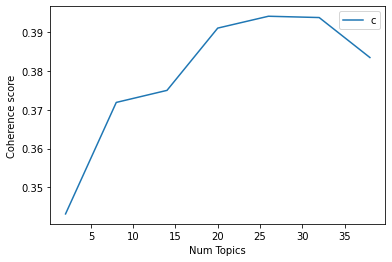

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3432
Num Topics = 8  has Coherence Value of 0.3719
Num Topics = 14  has Coherence Value of 0.375
Num Topics = 20  has Coherence Value of 0.3911
Num Topics = 26  has Coherence Value of 0.3942
Num Topics = 32  has Coherence Value of 0.3938
Num Topics = 38  has Coherence Value of 0.3835


In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(20)

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.520701000474011


NameError: ignored

In [ ]:
# Creating the term dictionary of our courpus that is of all the words (Sepcific to Genism syntax perspective), 
# where every unique term is assigned an index. 

dict_ = corpora.Dictionary(clean_corpus)

print(dict_)

In [ ]:
for i in dict_.values():
    print(i)

In [ ]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]
doc_term_matrix

In [ ]:
# Creating the object for LDA model using gensim library

Lda = gensim.models.ldamodel.LdaModel
# Running and Training LDA model on the document term matrix.

ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dict_, passes=20, alpha=0.01, eta=0.0001, random_state=30, eval_every=None)
# Prints the topics with the indexes: 0,1,2 :

# ldamodel.print_topics()

# we need to manually check whethere the topics are different from one another or not

In [ ]:
# print(ldamodel.print_topics(num_topics=10, num_words=20))

# num_topics mean: how many topics want to extract 
# num_words: the number of words that want per topic

In [ ]:
# saving the topic associations with the documents to .csv
import csv

#header = ['NameOfDoc', 'WeightPerTopic']

with open('/content/drive/MyDrive/lda_silhouette/weight_per_topic.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    #writer.writerow(header)

    #count = 0
    for i in ldamodel[doc_term_matrix]:
        #print("doc : ",count,i)
        # write the data
        writer.writerow(i)
        #count += 1

In [ ]:
import os
import pandas as pd

dirpath_= '/content/drive/MyDrive/lda_silhouette/Names_comma/'
output = '/content/drive/MyDrive/lda_silhouette/name.csv'
csvout_lst = []
files_= [os.path.join(dirpath_, fname) for fname in os.listdir(dirpath_)]

for filename in sorted(files_):
    data = pd.read_csv(filename, index_col=0, header=None)
    csvout_lst.append(data)
#csvout_lst.index
#print(csvout_lst)
#print (np.arange(len(csvout_lst.index)))
pd.concat(csvout_lst).to_csv(output, index=True)

In [ ]:
from pandas import read_csv
df = read_csv('/content/drive/MyDrive/lda_silhouette/name.csv')
corpus = df.values
print(corpus)

[['rmse' ' correct' ' pred' ... nan nan nan]
 ['one' ' true' ' posit' ... nan nan nan]
 ['standard' ' import' ' still' ... nan nan nan]
 ...
 ['config' ' name' ' space' ... nan nan nan]
 ['set' ' configur' ' yaml' ... nan nan nan]
 ['set' ' compon' ' setup' ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
corpus = []
corpus = texts_file.read()

In [ ]:
corpus.shape

(1999, 668)

In [ ]:
# Creating the term dictionary of our courpus that is of all the words (Sepcific to Genism syntax perspective), 
# where every unique term is assigned an index. 

dict_ = corpora.Dictionary(corpus)

print(dict_)

TypeError: ignored

In [ ]:
for i in dict_.values():
    print(i)

In [ ]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in corpus]
doc_term_matrix

In [ ]:
# Creating the object for LDA model using gensim library

Lda = gensim.models.ldamodel.LdaModel

In [ ]:
# Running and Training LDA model on the document term matrix.

ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dict_, passes=5, alpha=0.1, eta=0.0001, random_state=30, eval_every=None)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
# Prints the topics with the indexes: 0,1,2 :

ldamodel.print_topics(num_topics=10)

# we need to manually check whethere the topics are different from one another or not

# saving the topics to .csv
import csv

header = ['WordsPerTopic']

with open('/content/drive/MyDrive/lda_silhouette/words_per_topic.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    #writer.writerow(header)

    count = 0
    for i in ldamodel[doc_term_matrix]:
        #print("doc : ",count,i)
        # write the data
        writer.writerow(i)
        count += 1

In [ ]:
print(ldamodel.print_topics(num_topics=6, num_words=5))

# num_topics mean: how many topics want to extract 
# num_words: the number of words that want per topic

[(9, '0.005*"gener random data predict without fit random normal size rais fit error gaussian cluster min compon predict" + 0.005*"mani lap complet date extract question question token token token question file tabl question context tabl question context read file file question token number entiti tabl question context get entiti question number entiti" + 0.005*"coverag semant parser experi json model train save load ensur model train save load" + 0.005*"model preserv token loss forward loss backward loss embed token embed mask batch weight embed loss forward loss backward loss forward pass run correctli train tensor dataset tensor dict result model train tensor set result embed result tupl embed shape expect embed shape loss result item forward loss result item backward loss result item almost equal loss forward loss backward loss decim" + 0.005*"sympi physic quantum cartesian sympi physic quantum cartesian arg"'), (8, '0.005*"given valid credenti run integr modul use valid credenti e

In [ ]:
# printing the topic associations with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

In [ ]:
# saving the topic associations with the documents to .csv
import csv

header = ['NameOfDoc', 'WeightPerTopic']

with open('/content/drive/MyDrive/lda_silhouette/weight_per_topic.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    #writer.writerow(header)

    count = 0
    for i in ldamodel[doc_term_matrix]:
        #print("doc : ",count,i)
        # write the data
        writer.writerow(i)
        count += 1

In [ ]:
documents = corpus.tolist()

In [ ]:
print(documents[5])

['exampl txt read exampl list exampl list data exampl list path path join get temp dir gfile open exampl list path write exampl list data exampl dataset util read exampl list exampl list path list equal exampl']


In [ ]:
start = time.time()
preprocessed_documents = [" ".join(s) for s in documents]
print(f"Preprocessing time: {time.time()-start:.1f}s.")

Preprocessing time: 0.0s.


In [ ]:
import nltk
nltk.download('stopwords')
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=10, stop_words=stopwords.words('english')+['like', 'said', 'could', 'would', 'one', 'know', 'us'], max_features=1000)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tf = tf_vectorizer.fit_transform(preprocessed_documents).toarray()


In [ ]:
features = tf_vectorizer.get_feature_names_out()

In [ ]:
tf.shape

(1999, 785)

In [ ]:
len(features)

785

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [ ]:
from utils import print_topics, get_topics_top_words
n_topics = 5
# alpha = 1 / n_components, beta = 1 / n_components
model = LDA(n_components=n_topics, random_state=0)
# calculate document-to-topic matrix
doc_topic = model.fit_transform(tf)

In [ ]:
from sklearn.cluster import KMeans

C = 5
random_state = 42
clusterer = KMeans(n_clusters=C, random_state=random_state)
cluster_labels = clusterer.fit_predict(doc_topic)

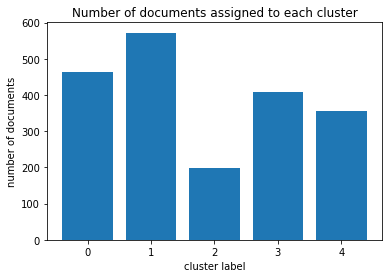

In [ ]:
x, y = np.unique(cluster_labels, return_counts=True)
plt.bar(x, y)
plt.xticks(range(C), range(C))
plt.title("Number of documents assigned to each cluster")
plt.xlabel("cluster label")
plt.ylabel("number of documents")
plt.show()

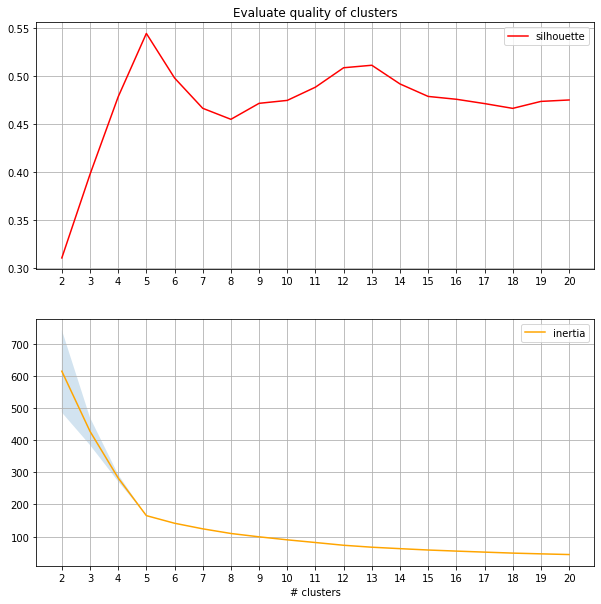

In [ ]:
from sklearn import metrics

def plot_cluster_metrics(data, min_clusters=2, max_clusters=20, iters=10):
    n_clusters = []

    wgss_mean = [] # within group sum of squares, or inertia
    wgss_var = [] # variance of results because it's stochastic

    silhouette_mean = []
    silhouette_var = []
    
    for n in range(min_clusters, max_clusters+1):
        n_clusters.append(n)

        wgss_iters = []
        silhouette_iters = []

        for i in range(iters):
            clusterer = KMeans(n_clusters=n).fit(data)
            wgss_iters.append(clusterer.inertia_)
            silhouette_iters.append(metrics.silhouette_score(data,
                                                             clusterer.labels_,
                                                             metric='euclidean'))

        wgss_mean.append(np.array(wgss_iters).mean())
        wgss_var.append(np.array(wgss_iters).var())

        silhouette_mean.append(np.array(silhouette_iters).mean())
        silhouette_var.append(np.array(silhouette_iters).var())

    wgss_mean = np.array(wgss_mean)
    wgss_var = np.array(wgss_var)

    silhouette_mean = np.array(silhouette_mean)
    silhouette_var = np.array(silhouette_var)
    
    # plot every metric
    plt.figure(figsize=(10, 10))
    
    plt.subplot(211)
    plt.xticks(n_clusters)
    plt.plot(n_clusters, silhouette_mean, alpha=1, color='red', label='silhouette')
    plt.fill_between(n_clusters,
                     silhouette_mean-silhouette_var,
                     silhouette_mean+silhouette_var,
                     alpha=0.2)
    plt.title("Evaluate quality of clusters")
    plt.grid(True)
    plt.legend()
    
    plt.subplot(212)
    plt.xticks(n_clusters)
    plt.plot(n_clusters, wgss_mean, alpha=1, label='inertia', color='orange')
    plt.fill_between(n_clusters, wgss_mean-wgss_var, wgss_mean+wgss_var, alpha=0.2)
    plt.xlabel("# clusters")
    plt.legend()
    plt.grid(True)
    
    #plt.savefig("part-2-images/clustering-metrics.jpg", dpi=100)
    plt.show()
    return
plot_cluster_metrics(doc_topic)

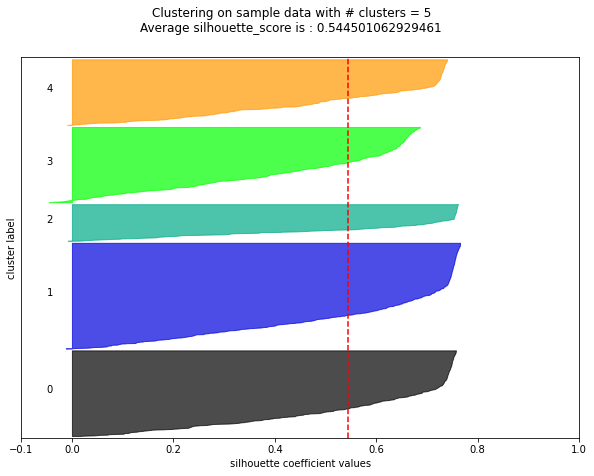

In [ ]:
# adapted from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_
# silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

def plot_cluster_silhouette(data, n_clusters, cluster_labels):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Clustering on sample data with # clusters = "
                  + str(n_clusters) + "\nAverage silhouette_score is : "
                  + str(silhouette_avg)))
    
    #plt.savefig("part-2-images/clustering-silhouette.jpg", dpi=100)
    plt.show()
C = n_topics
clusterer = KMeans(n_clusters=C, random_state=random_state)
cluster_labels = clusterer.fit_predict(doc_topic)

plot_cluster_silhouette(doc_topic, C, cluster_labels)